Expecting to be HIP: <br/> Hawkes Intensity Processes for Social Media Popularity
===

This repository contains:
- the link to [an interactive visualization system](#hip-visualization-system) for HIP;
- [a short tutorial](#using-hip-and-the-active-dataset-a-short-tutorial) on exploring the ACTIVE dataset and fitting HIP to data;
- the [ACTIVE twitted videos dataset](#the-active-dataset);
- the code required for [fitting HIP to real data](#fitting-hip) and [forecasting future popularity with HIP](#forecasting-with-hip).

*Refereces*:  
Rizoiu, M.-A., Xie, L., Sanner, S., Cebrian, M., Yu, H., & Van Hentenryck, P.
**Expecting to be HIP: Hawkes Intensity Processes for Social Media Popularity**. 
In *26th International Conference on World Wide Web - WWW ’17*, pp. 735-744, Perth, Australia, 2017.
doi: [10.1145/3038912.3052650](http://doi.org/10.1145/3038912.3052650)  
[pdf at arxiv with supplementary material](https://arxiv.org/pdf/1602.06033.pdf)

Rizoiu, M.-A., & Xie, L. (2017). 
**Online Popularity under Promotion: Viral Potential, Forecasting, and the Economics of Time**. 
In *11th International AAAI Conference on Web and Social Media - ICWSM '17*, p. 10, Montréal, Canada, 2017.  
[pdf at arxiv with supplementary material](https://arxiv.org/pdf/1703.01012.pdf)

# HIP visualization system
This is an *interactive* visualization of the plots in the paper: the endo-exo map, observed and fitted popularity series and video metadata.
It has additional visualizations of TED videos and VEVO musicians.
Furthermore, it allows users to add and compare their own videos.

**(access the visualizer by clicking on the thumbnail below)**

[<img src="util/demo-screenshot.png">](http://130.56.253.177/)

# Using HIP and the ACTIVE dataset: a short tutorial

First load (and if required install) the libraries needed for HIP. 
The file `code/functions-fitting-data.R` contains all functions for simulating and fitting.

In [17]:
## make sure required packages are installed and loaded
source("code/requiredPackages.R")
source("code/functions-fitting-data.R")

## The ACTIVE dataset

Load the ACTIVE dataset from the JSON format. Note that this requires more that 8GB of memory, due to the `jsonlite` library. In order to speed up the dataset loading for subsequent executions, after the first loading we create a R binary file. The binary file speeds up loading considerably.

In [18]:
## load the ACTIVE dataset. First time it gets loaded from the JSON format and duplicated 
## into an R binary file (way faster to load, less memory consumption)
## check if the binary exists
if ( !file.exists("data/active-dataset.dat")) {
  print("--> Loading the ACTIVE dataset from JSON format... might take a while!")
  dataset <- fromJSON(txt = "data/active-dataset.json.bz2", flatten = T)
  ## save repeating the lengthy loading process, by saving the "dataset" data.frame into a R binary file.
  save(dataset, file = "data/active-dataset.dat", compress = "bzip2")
} else {
  print("--> Loading the ACTIVE dataset from DAT format...")
  load("data/active-dataset.dat")
}

[1] "--> Loading the ACTIVE dataset from DAT format..."


Explore the content of the dataset. 
Each line is coresponds to a video. 
Columns correpond to the different information available for each video, such as video *title*, author (entitle here *channelTitle*), *uploadDate* etc.
HIP requires the series of views (*dailyViewcount*) as observed popularity and of shares (*numShare*) or tweets (*dailyTweets*) as exogenous stimuli.
Note that metadata information is not available for all videos.

In [19]:
## let's explore what information we have available for each video
print(names(dataset))

 [1] "YoutubeID"                 "numTweet"                 
 [3] "numShare"                  "numSubscriber"            
 [5] "watchTime"                 "dailyViewcount"           
 [7] "description"               "title"                    
 [9] "channelId"                 "channelTitle"             
[11] "category"                  "uploadDate"               
[13] "duration"                  "definition"               
[15] "dimension"                 "caption"                  
[17] "regionRestriction.blocked" "regionRestriction.allowed"
[19] "topicIds"                  "relevantTopicIds"         
[21] "totalShare"                "totalViewcount"           
[23] "totalTweet"                "dailyTweets"              


We can extract the information related to a single video, and print it for inspection.

In [20]:
## information about the first video in the dataset. For display reasons we exclude some fields.
dataset[1, names(dataset)[! names(dataset) %in% c("numTweet", "watchTime", "numSubscriber")]]

YoutubeID,numShare,dailyViewcount,description,title,channelId,channelTitle,category,uploadDate,duration,⋯,dimension,caption,regionRestriction.blocked,regionRestriction.allowed,topicIds,relevantTopicIds,totalShare,totalViewcount,totalTweet,dailyTweets
00-6OyXVA0M,"254, 1399, 493, 242, 175, 216, 372, 729, 305, 154, 75, 68, 60, 44, 44, 44, 39, 24, 25, 28, 15, 17, 18, 14, 16, 15, 8, 12, 9, 1, 3, 5, 8, 3, 7, 7, 3, 4, 4, 1, 3, 3, 2, 3, 6, 0, 4, 4, 2, 4, 0, 8, 6, 3, 5, 4, 3, 2, 2, 1, 4, 13, 12, 12, 13, 5, 7, 2, 9, 4, 2, 3, 0, 7, 1, 1, 3, 1, 1, 5, 3, 10, 0, 4, 5, 1, 0, 2, 3, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 6, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 4, 4, 4","90158, 695628, 312298, 170348, 82346, 61530, 76116, 229360, 109262, 40695, 26952, 18167, 13951, 11266, 11866, 18949, 18264, 13971, 8641, 7085, 5337, 4063, 4119, 5385, 4898, 4270, 3447, 3061, 2491, 1897, 1836, 2192, 2087, 2118, 2010, 1993, 1792, 1921, 1977, 1671, 1594, 1404, 1574, 1483, 1459, 1671, 1400, 1252, 1383, 1251, 1375, 1176, 1528, 1270, 1760, 1526, 1295, 1049, 1034, 1308, 1353, 1965, 2950, 2402, 1800, 1636, 2010, 1573, 1443, 1254, 1307, 1224, 888, 1021, 861, 982, 855, 1176, 1275, 1729, 2061, 2982, 1760, 1872, 1708, 1139, 1084, 1152, 901, 629, 585, 601, 465, 498, 627, 482, 629, 658, 714, 747, 566, 664, 546, 433, 357, 463, 379, 373, 450, 493, 452, 452, 423, 1056, 1407, 1153, 1081, 664, 576, 471, 400, 572, 639, 711, 525, 499, 893, 999, 1308, 1073",Bill's response to Victoria Osteen's congregational message. The Osteen video was already out before I did the added clip of Bill Cosby.,Bill Cosby responds to Victoria Osteen,UCpzGw-b-rEPjRs2LT0ZVHTQ,Bryant Harris,Entertainment,2014-08-29 06:19:14,PT39S,⋯,2d,false,NULL,NULL,"/m/03bxbhz, /m/03ny9x , /m/014zfs",/m/06bvp,5206,2174286,3857,"2588, 455, 157, 100, 86, 76, 102, 64, 28, 23, 21, 14, 16, 7, 8, 8, 7, 2, 3, 6, 3, 2, 5, 2, 4, 0, 2, 1, 0, 1, 1, 1, 0, 2, 4, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 3, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA"


Next, we select the views and shares series for the video **bUORBT9iFKc** presented in the paper, in Fig. 2a.

In [21]:
## let's get the #views and #shares series for a video
vidYT <- "bUORBT9iFKc"
vidID <- which(dataset$YoutubeID == vidYT)

views <- dataset$dailyViewcount[[vidID]]
shares <- dataset$numShare[[vidID]]

We plot the two series on the same graph, on different y axes.

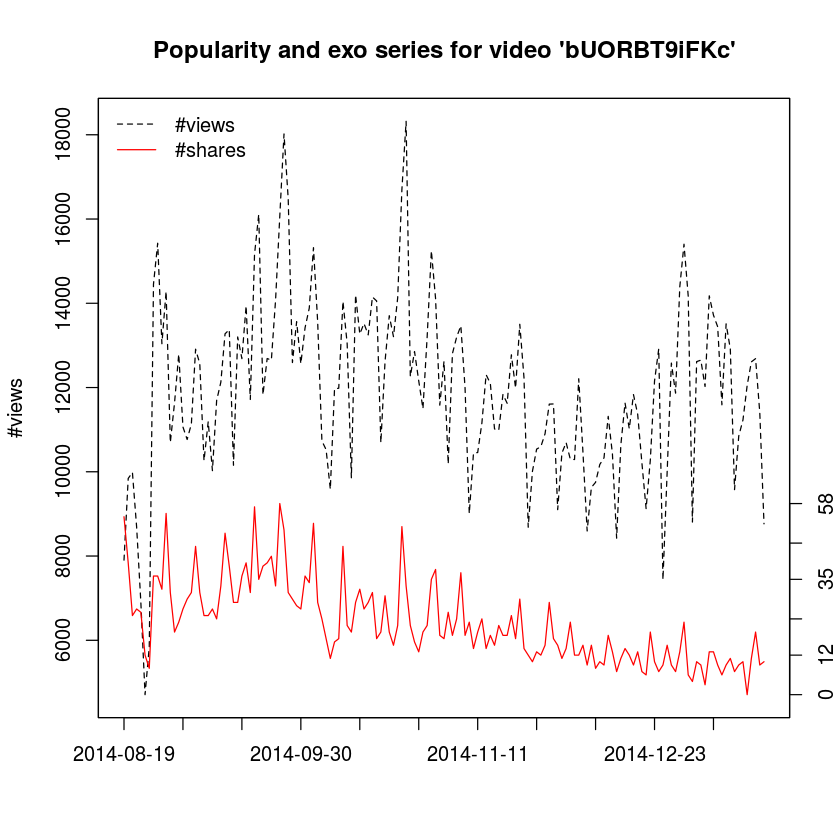

In [22]:
## and plot how this looks like
dates <- as.Date(dataset$uploadDate[[vidID]]) + 1:length(views) - 1 
plot(dates, views, type = "l", lty = 2, xaxt = "n",
     xlab = "", ylab = "#views", 
     main = sprintf("Popularity and exo series for video '%s'", dataset$YoutubeID[[vidID]] ))
axis(1, at=dates[seq(from = 1, to = length(views), by = 14)], cex.axis = 1,
     labels=dates[seq(from = 1, to = length(views), by = 14)])
# and now the external influence on another axis
par(new=TRUE)
y_limit <- range(shares)
# scale it down
y_limit[2] <- y_limit[2] * 3
plot(x = dates, y = shares, type="l", col="red", ylim = y_limit,
     xaxt="n", yaxt="n", xlab="", ylab="")
axis(4, cex.main = 1.5, cex.axis = 1, cex.lab = 1.5, 
     at = round(seq(from = range(shares)[1], to = range(shares)[2], 
                    length.out = 6)) )
legend("topleft", legend = c("#views", "#shares"), col = c("black", "red"), lty = c(2, 1), bty = "n")

## Fitting HIP

The next step is to fit the parameters of the HIP model to the above video, based on the views and shares series during its first 90 days after upload.
Views serves as the observed popularity, while shares is the exogeneous stimuli.
The initial parameters can be set manualy (see the function definition), however in this example we let them by default.
Note that fitting HIP can take a while.

In [23]:
oldw <- getOption("warn")
options(warn = -1)
## We fit the parameters of the HIP model on the first 90 days of video life. 
## Use the extracted #shares during the same period of 1-90 days as external influence.
fitted_params <- fit_series(data_series = views[1:90], ext_infl = list(shares = shares[1:90]),
                            lowerBound = c(gamma = 0, eta = 0, K = 0, beta = 0.1, c = -Inf, theta = 0, mu1 = 0),
                            upperBound = c(gamma = Inf, eta = Inf, K = Inf, beta = 0.1, c = Inf, theta = Inf, mu1 = Inf) )
options(warn = oldw)

Let us explore the fitted parameters. Note that both parameters K and beta are present, however beta is fixed at 0.1 using the bouds in the fitting.
This is because HIP boundles together these two parameters into the parameter C, as defined in Theorem 2.1 in the paper.

In [24]:
## print HIP fitted parameters
print(fitted_params$model$par)

      gamma         eta           K        beta           c       theta 
 917.385494 5042.948836    6.777116    0.100000   10.557258    1.166210 
        mu1 
 129.117840 


Using the fitted parameters and the external stimuli series (shares), we can simulate the popularity series for the first 90 days.
This is useful for evaluating how well did HIP fit the data:

In [25]:
## based on the fitted parameters, use HIP to generate a fitted series
fitted_counts <- generate_simulated_data(params = fitted_params$model$par, time = 89, 
                                         ext_infl = list(shares = shares[1:90]) )$Count

## print the real and the HIP fitted popularity series side-by-side
print(rbind(observed = views[1:90], HIP = fitted_counts))

             [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]
observed 7903.000  9842.00 9985.000 8687.000 6902.000 4709.000 5846.000
HIP      7889.749 10503.29 8782.314 9267.092 9350.889 7859.724 7450.864
             [,8]     [,9]    [,10]   [,11]    [,12]     [,13]    [,14]
observed 14451.00 15425.00 13040.00 14285.0 10695.00 11635.000 12792.00
HIP      11147.97 11361.58 11037.74 14163.3 11319.33  9883.851 10321.19
            [,15]    [,16]    [,17]    [,18]    [,19]    [,20]    [,21]
observed 11064.00 10767.00 11136.00 12910.00 12566.00 10264.00 11190.00
HIP      10903.84 11375.32 11727.94 13633.86 11985.81 11159.62 11200.14
            [,22]   [,23]    [,24]    [,25]    [,26]    [,27]    [,28]    [,29]
observed 10027.00 11689.0 12128.00 13275.00 13374.00 10155.00 13200.00 12686.00
HIP      11499.97 11164.2 12491.03 14641.28 13505.68 12177.51 12210.22 13277.21
            [,30]    [,31]    [,32]    [,33]    [,34]    [,35]   [,36]    [,37]
observed 13940.00 11717.00 15163

Furthermore, we can add the fitted popularity series to the previously constructed graph. Note the tight fit between observed and fitted popularity.

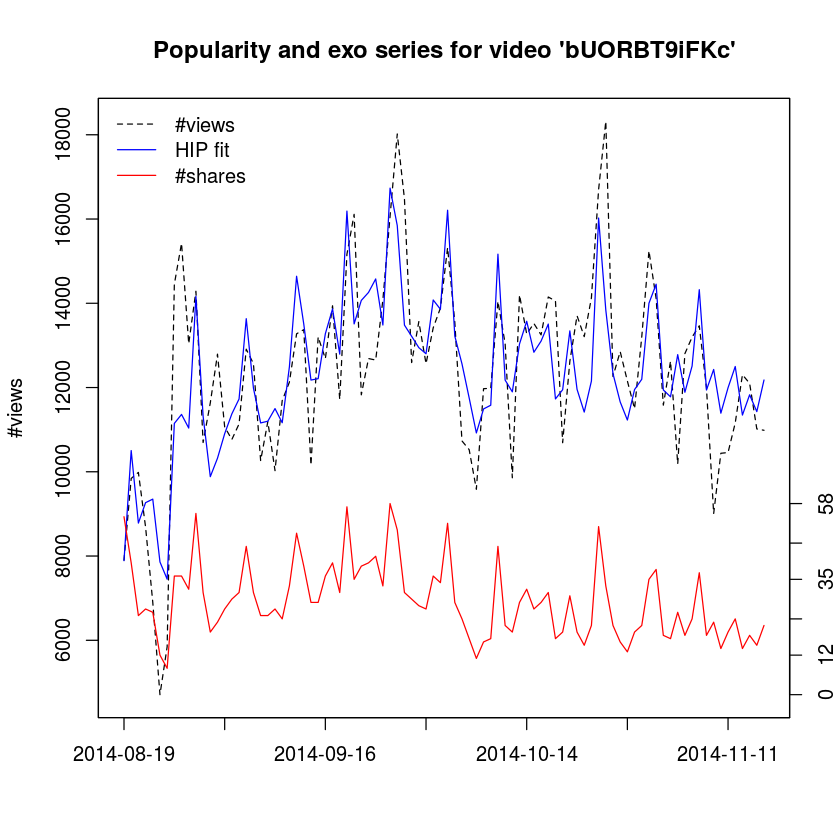

In [26]:
## replot the same thing as above (#views and #shares), but restrict to the first 90 days 
## and add the fitted series on top
dates <- as.Date(dataset$uploadDate[[vidID]]) + 1:length(views) - 1 
plot(dates[1:90], views[1:90], type = "l", lty = 2, xaxt = "n",
     xlab = "", ylab = "#views", 
     main = sprintf("Popularity and exo series for video '%s'", dataset$YoutubeID[[vidID]] ))
lines(x = dates[1:90], y = fitted_counts, col = "blue", lty = 1)

axis(1, at=dates[seq(from = 1, to = length(views), by = 14)], cex.axis = 1,
     labels=dates[seq(from = 1, to = length(views), by = 14)])
# and now the external influence on another axis
par(new=TRUE)
y_limit <- range(shares)
# scale it down
y_limit[2] <- y_limit[2] * 3
plot(x = dates[1:90], y = shares[1:90], type="l", col="red", ylim = y_limit,
     xaxt="n", yaxt="n", xlab="", ylab="")
axis(4, cex.main = 1.5, cex.axis = 1, cex.lab = 1.5, 
     at = round(seq(from = range(shares)[1], to = range(shares)[2], 
                    length.out = 6)) )
legend("topleft", legend = c("#views", "HIP fit", "#shares"), 
       col = c("black", "blue", "red"), lty = c(2, 1, 1), bty = "n")

## Computing measures based on HIP

Based on the HIP model fitted here above, we can compute four measures:
- two measures (*exogeneous sensitivity* and *endogenous response*) used to explain popularity dynamics (see **WWW '17 paper** for more details);
- two measures (*virality score* and *maturity time*) which discribe the video's online popularity potential, under promotion (proposed in the **ICWSM '17** paper).

In [27]:
measures <- get_endogenous_response(params = fitted_params$model$par)

measures$exo <- as.numeric(fitted_params$model$par["mu1"])
measures$virality_score <- measures$exo * measures$endo

print(unlist(measures[c("exo", "endo", "virality_score", "maturity_time")]), digits = 3)

           exo           endo virality_score  maturity_time 
        129.12           1.64         211.84         102.00 


## Forecasting with HIP

Following the experimental protocol in the paper, we use HIP to forecast the popularity series between days 91 and 120. We add this forecast to the previously constructed graph.

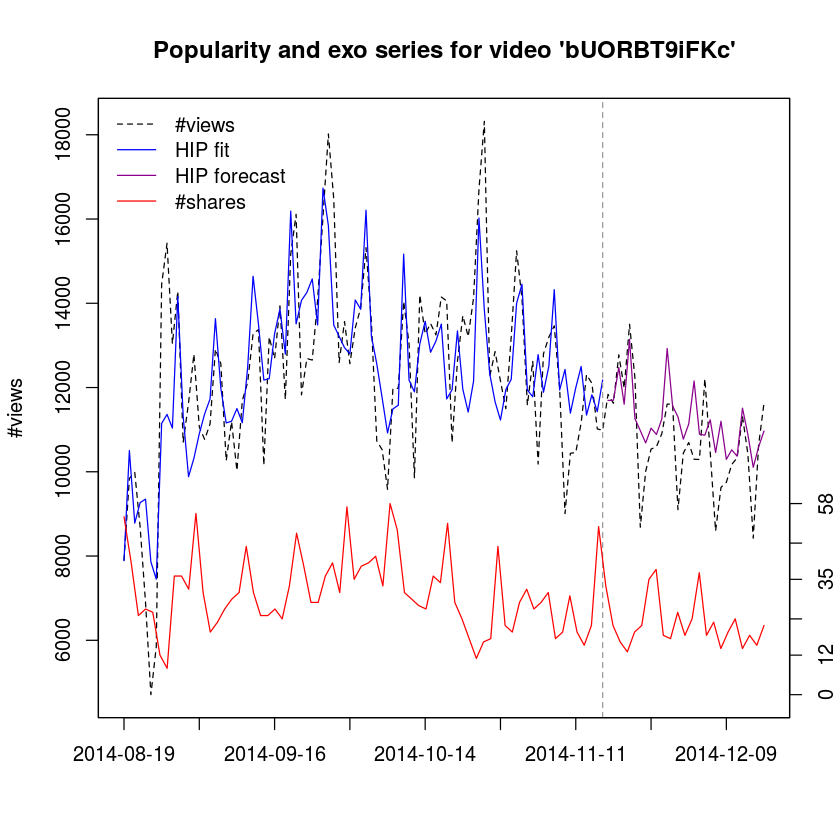

In [28]:
# using HIP and its fitted parameters, get the popularity series from 91 days to 120 days
## note that the generate_simulate_data function counts days from 0, so the 120th day is day 119.
forecasted_counts <- generate_simulated_data(params = fitted_params$model$par, 
                                             time = 119, 
                                             ext_infl = list(shares = shares[1:120]), 
                                             prefix = views[1:90] )$Count[91:120]

## plot again the previous graph, extending the time horizon to 1-120 days and adding the forecast
dates <- as.Date(dataset$uploadDate[[vidID]]) + 1:length(views) - 1 
plot(dates[1:120], views[1:120], type = "l", lty = 2, xaxt = "n",
     xlab = "", ylab = "#views", 
     main = sprintf("Popularity and exo series for video '%s'", dataset$YoutubeID[[vidID]] ))
lines(x = dates[1:120], y = c(fitted_counts, rep(x = NA, times = 30)), col = "blue", lty = 1)
abline(v = dates[90], col = "gray60", lty = 2) ##separate training and forecasting with a vertical line
lines(x = dates[1:120], y = c(rep(x = NA, times = 90), forecasted_counts), col = "darkmagenta", lty = 1)

axis(1, at=dates[seq(from = 1, to = length(views), by = 14)], cex.axis = 1,
     labels=dates[seq(from = 1, to = length(views), by = 14)])
# and now the external influence on another axis
par(new=TRUE)
y_limit <- range(shares)
# scale it down
y_limit[2] <- y_limit[2] * 3
plot(x = dates[1:90], y = shares[1:90], type="l", col="red", ylim = y_limit,
     xaxt="n", yaxt="n", xlab="", ylab="")
axis(4, cex.main = 1.5, cex.axis = 1, cex.lab = 1.5, 
     at = round(seq(from = range(shares)[1], to = range(shares)[2], 
                    length.out = 6)) )
legend("topleft", legend = c("#views", "HIP fit", "HIP forecast", "#shares"), 
       col = c("black", "blue", "darkmagenta", "red"), lty = c(2, 1, 1, 1), bty = "n")


License
===

Both dataset and code are distributed under the *Creative Commons Attribution-NonCommercial 4.0 International* (CC BY-NC 4.0) license, a copy of which can be obtained [following this link](https://creativecommons.org/licenses/by-nc/4.0/legalcode). 
If you require a different license, please contact us at [Marian-Andrei@rizoiu.eu](mailto:Marian-Andrei@rizoiu.eu) or [Lexing.Xie@anu.edu.au](mailto:Lexing.Xie@anu.edu.au).